# Multiple Linear Regression Assignment

TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Buradan Sales Sütunu hedef yani y=df['Sales']. TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

In [6]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

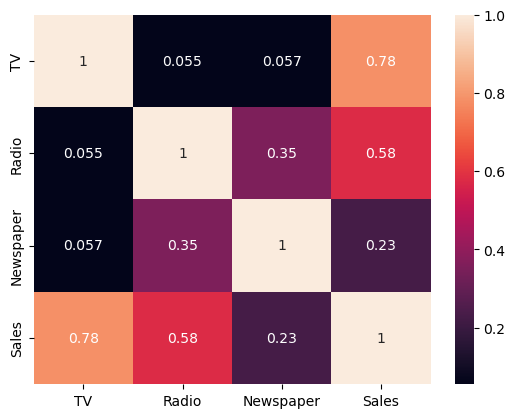

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True);

## Modelling

In [10]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
lr = LR()

In [12]:
x = df.drop('Sales', axis=1)
y = df['Sales']

In [13]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)

In [14]:
model = lr.fit(x_train, y_train)

In [15]:
pred = model.predict(x_test)

In [16]:
print(f'Root mean squared error: {mse(y_test, pred) ** 0.5:.2f}')
print(f'R2 score: {r2_score(y_test, pred):.2f}')

Root mean squared error: 1.78
R2 score: 0.90


In [17]:
coefs = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
coefs.head()

,Coefficient
TV,0.044730
Radio,0.189195
Newspaper,0.002761


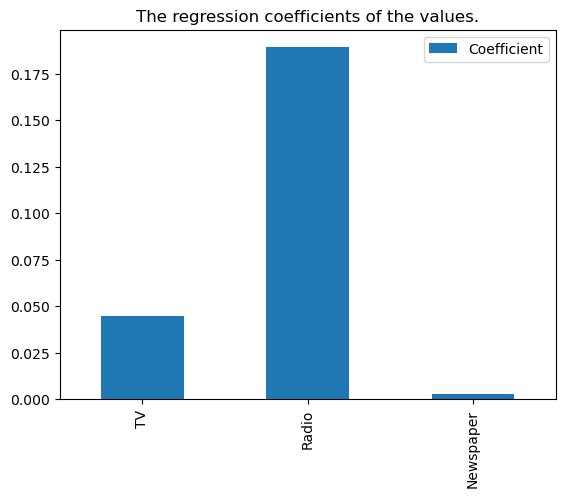

In [18]:
coefs.plot(kind='bar');
plt.title('The regression coefficients of the values.');

In [19]:
import matplotlib.pyplot as plt

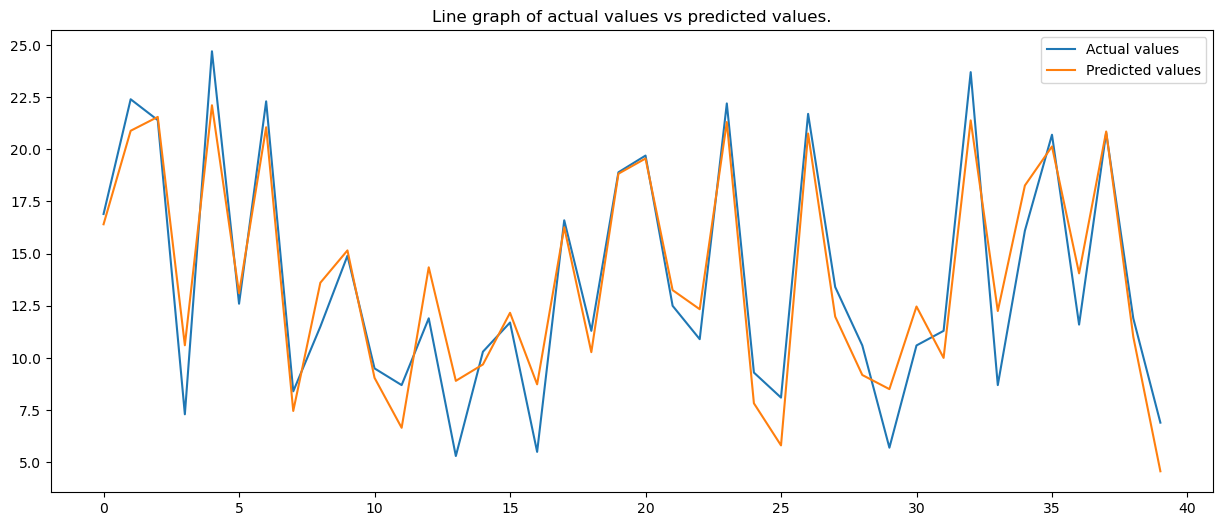

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual values');
plt.plot(pred, label='Predicted values');
plt.legend();
plt.title("Line graph of actual values vs predicted values.");

## Conclusion

The best advertisement method is Radio, followed by TV and Newspaper respectively. We come to this conclusion because Radio has the greatest coefficient in the linear regression algorithm.